In [1]:
import functools
import numpy as np
import pandas as pd
from DataLoader import DataLoader
import Models as Models

Using TensorFlow backend.


In [2]:
trainData = DataLoader()
trainData.getStats(2014, 2018)
testData = DataLoader()
testData.getStats(2018, 2019)

Loading Data: 2014
Loading Data: 2015
Loading Data: 2016
Loading Data: 2017
Loading Data: 2018


In [6]:
data = []
model = Models.sqErrModel()
model.fit(trainData.statsFrame, trainData.didHomeWinFrame,
            epochs=40,
            batch_size=100)
score, acc = model.evaluate(testData.statsFrame, testData.didHomeWinFrame, batch_size=128)
data.append(acc)

Epoch 1/40
4707/4707 [==============================] - 0s 71us/step - loss: 0.2522 - accuracy: 0.5454
Epoch 2/40
4707/4707 [==============================] - 0s 21us/step - loss: 0.2460 - accuracy: 0.5723
Epoch 3/40
4707/4707 [==============================] - 0s 22us/step - loss: 0.2438 - accuracy: 0.5819
Epoch 4/40
4707/4707 [==============================] - 0s 22us/step - loss: 0.2405 - accuracy: 0.5838
Epoch 5/40
4707/4707 [==============================] - 0s 22us/step - loss: 0.2375 - accuracy: 0.5881
Epoch 6/40
4707/4707 [==============================] - 0s 21us/step - loss: 0.2326 - accuracy: 0.5991
Epoch 7/40
4707/4707 [==============================] - 0s 21us/step - loss: 0.2251 - accuracy: 0.6204
Epoch 8/40
4707/4707 [==============================] - 0s 21us/step - loss: 0.2206 - accuracy: 0.6405
Epoch 9/40
4707/4707 [==============================] - 0s 21us/step - loss: 0.2123 - accuracy: 0.6798
Epoch 10/40
4707/4707 [==============================] - 0s 22us/step - l

In [4]:
print(sum(data)/len(data))
#score, acc = model.evaluate(testData.statsFrame, testData.didHomeWinFrame, batch_size=128)
#print(score)
#print(acc)

0.675000011920929


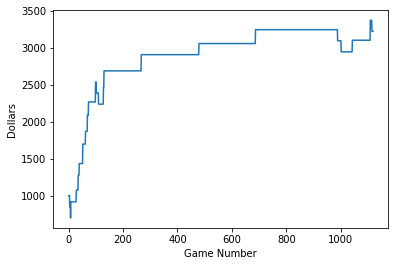

In [20]:
## Bet the predictions
from NBAScraper.Jimmy import Jimmy
import matplotlib.pyplot as plt 

dates = []
money = []
jim = Jimmy(1000)
game = 0
for i in range(testData.statsFrame.shape[0]):
    confidenceLevel = 0.75
    row = model.predict(testData.statsFrame.iloc[i:i+1])
    amount = 150
    homeOdds = testData.oddsFrame.iloc[i:i+1].values[0][1]
    awayOdds = testData.oddsFrame.iloc[i:i+1].values[0][0]
    result = int(testData.didHomeWinFrame.iloc[i:i+1].values[0][0])
    if row >= confidenceLevel and int(homeOdds) > 0:
        jim.bet(amount, homeOdds, result)
    if row <= 1-confidenceLevel and int(awayOdds) > 0:
        result = 1 - result
        jim.bet(amount, awayOdds, result)
    dates.append(game)
    game = game+1
    money.append(jim.getBalance())
plt.plot(dates, money)
plt.xlabel("Game Number")
plt.ylabel("Dollars")
plt.show()